# Task 1
## Case 2

### Task description

![image.png](Task1_desc.png)

## 1. See the data

Let's read the data at first and see how it looks like

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("case2.txt", header=None, names=['Time', "Roll angle"])
data.head()

,Time,Roll angle
0,0.000,14413
1,0.004,14388
2,0.008,14367
3,0.012,14397
4,0.016,14401


Let's plot it

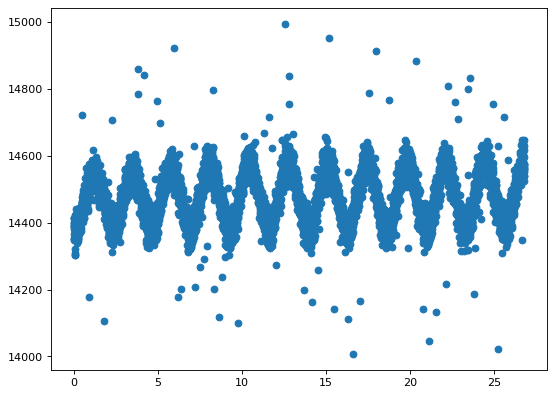

In [2]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(data["Time"], data["Roll angle"]);

## 2. Calculate the confidence interval

**Standard deviation:**
![image.png](std.png)

**Standard error:**
![image.png](std_error.png)

**Margin of error:**
![image.png](ME.png)

So confidence interval should be
$$\{\bar{x} - \frac{ME}{100} * \bar{x}, \space\space\space \bar{x} + \frac{ME}{100} * \bar{x}\}$$

In [3]:
x_mean = np.mean(data["Roll angle"])
n = len(data["Roll angle"])

std = np.sqrt(((data["Roll angle"] - x_mean)**2).sum()/(n - 1))
std_error = std/np.sqrt(n)
print("Standard deviation:", std)

#z value from table
z = 1.96
ME = z * std_error
print("Margin of error (in %):", ME)
print(f"Confidence Interval: {{{x_mean - x_mean * ME/100},  {x_mean + x_mean * ME/100 }}}", )

Standard deviation: 79.20274448112136
Margin of error (in %): 1.8965264358115914
Confidence Interval: {14203.009307303513,  14752.151588218876}


### 2.1 Plot data belongs to confidence interval

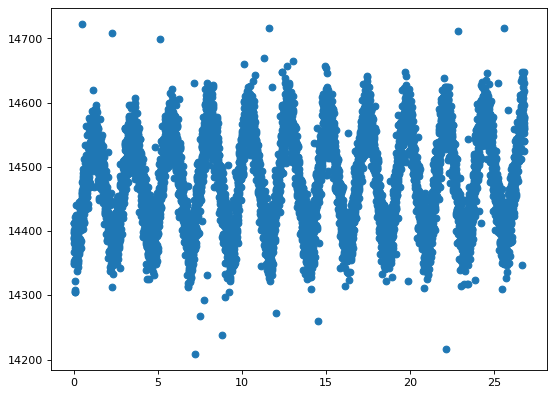

In [4]:
new_data = data[(x_mean - x_mean * ME/100 < data["Roll angle"]) & (data["Roll angle"] < x_mean + x_mean * ME/100)]

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(new_data["Time"], new_data["Roll angle"])

## 3. Approximation using linear regression

**Linear regression:**
![](LR.png)
We should minimize $\epsilon$. So consider that we can find
![](LR_sol.png)

In [5]:
X = pd.DataFrame(new_data['Time'])
X['b'] = 1
Y = new_data["Roll angle"]

# B - params
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

#### Plot linear regression solution 

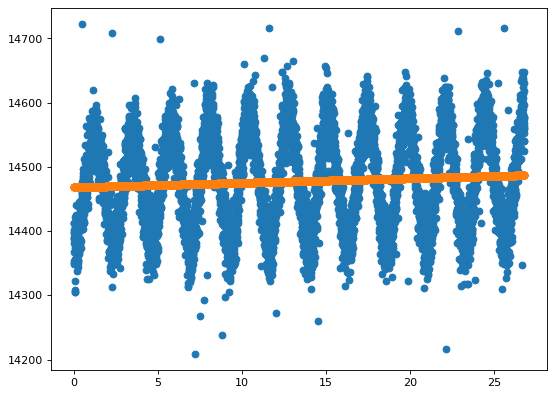

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(new_data["Time"], new_data["Roll angle"])
plt.scatter(new_data["Time"], np.dot(X, B));

### Conclusion

We found confidence interval for our date, removed outliers and build linear regression model.  
We have sinusoidal data, but linear regression just predicts line. So for better prediction it's better to use polynomial regression.

# Task 2

## RANSAC

![](Task2_desc.png)

## 1 Data representation

In [7]:
data = pd.read_csv("data_set_9_.txt", header=None, names=['x', 'y', 'z'])
data.head()

,x,y,z
0,0.058909,3.382850,-2.67739
1,0.615211,2.875370,-4.95143
2,1.564200,0.017716,-6.83873
3,1.396620,-4.722630,-1.26047
4,0.509141,3.624920,-5.17063


**Plot data**  
This is interactive plot, so you can play with it in Jupyter Notebook 

<IPython.core.display.Javascript object>


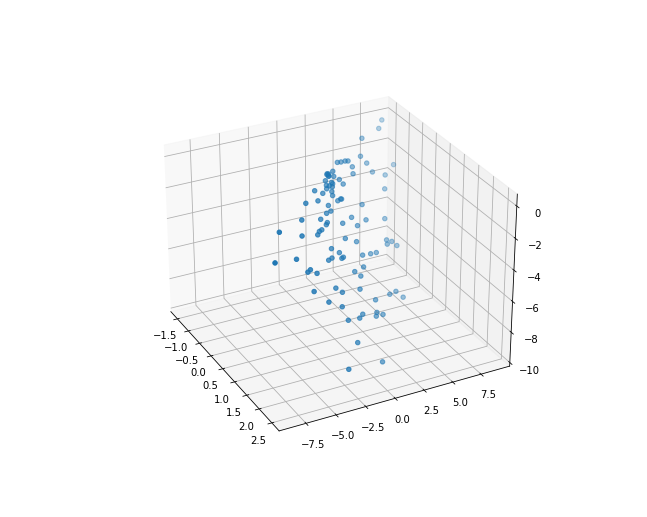

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = plt.axes(projection='3d')
ax.scatter3D(data.x, data.y, data.z, 'gray');

We can see, that our data looks like a plane.

## 2 RANSAC

We will use RANSAC sklearn implementation.  

We use `minimum sample set` equals to 3, because this minimum number of points to build a plane.  
Also we set `stop probability`. This parameter define the number of iterations of RANSAC.  
This is equal to `N >= log(1 - probability) / log(1 - e**m)`, where `e` is the current fraction of inliers w.r.t. the total number of samples and `m= 1 - inlier_ratio ** min_samples`.


In [9]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(min_samples=3, stop_probability=0.99)
ransac.fit(data[['x','y']], data['z'])
print("RANSAC score:", ransac.score(data[['x','y']], data['z']))

RANSAC score: 0.999999999986451


**Plot resulting plane**

In [10]:
z = lambda x,y: ransac.estimator_.coef_[0] * x + ransac.estimator_.coef_[1] * y + ransac.estimator_.intercept_

X = [min(data.x),max(data.x)]
Y = [min(data.y),max(data.y)]
X, Y = np.meshgrid(X, Y)
zs = np.array(z(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

This is an interactive plot. So you can play with it and find better angle of view.

<IPython.core.display.Javascript object>


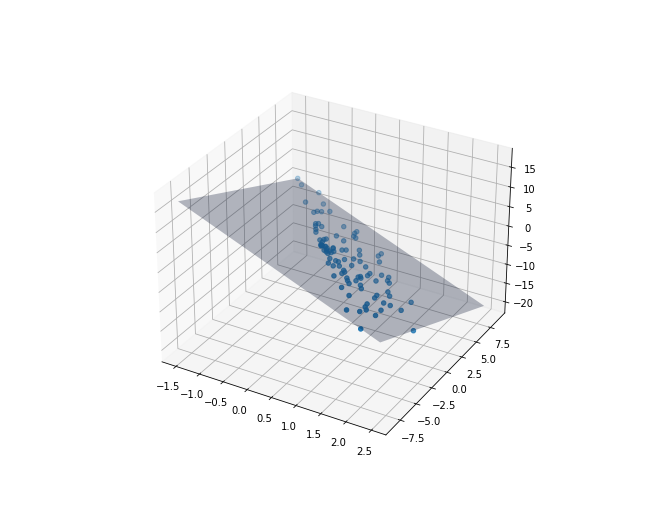

In [11]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = plt.axes(projection='3d')
ax.scatter3D(data.x, data.y, data.z);
ax.plot_surface(X,Y,Z, color=(0.1, 0.2, 0.5, 0.3));

### Conclusion

#### We built RANSAC model. It fits our data very well, because almost all data points lays on plane. 